YOUR NAME
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [3]:
import pandas as pd
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14. stalk_color_above_ring - ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
 15. stalk_color_below_ring - ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
 16. veil_type - ['p']
 17. veil_color - ['w' 'n' 'o' 'y']
 18. ring_number - ['o' 't' 'n']
 19. ring_type - ['p' 'e' 'l' 'f' 'n']
 20. spore_print_color - ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
 21. population - ['s' 'n' 'a' 'v' 'y' 'c']
 22. habitat - ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [4]:
'''your code here. add cells as needed'''
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import numpy as np

In [5]:
y = mushrooms_df['type']
X = mushrooms_df.drop(columns='type')

cat_features = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_size', 'gill_color', 'stalk_shape',
                'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring',
                'veil_type', 'veil_color', 'ring_type', 'spore_print_color', 'habitat']
cat_enc = OneHotEncoder()

ord_features = ['gill_spacing', 'ring_number', 'population']
ord_enc = OrdinalEncoder()

ct = ColumnTransformer([
    ('hot', cat_enc, cat_features),
    ('ord', ord_enc, ord_features)
],
    remainder='passthrough',
    verbose_feature_names_out=False
    )

X_trans = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()

lab_enc = LabelEncoder()

y_trans = lab_enc.fit_transform(y)
label_names = lab_enc.classes_

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans)

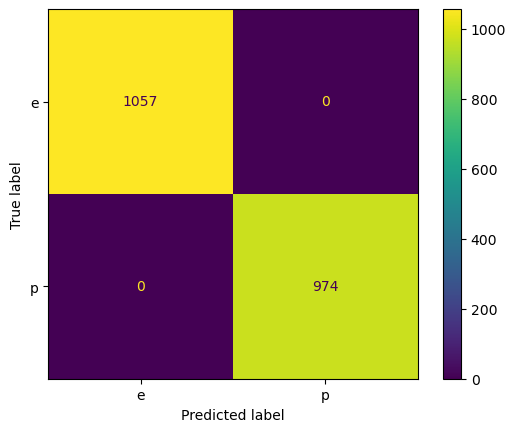

In [6]:

# Logistic Regression Model

log_reg = LogisticRegression(penalty = None, max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_log_reg)
# Label the confusion matrix as logisitic regression
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()

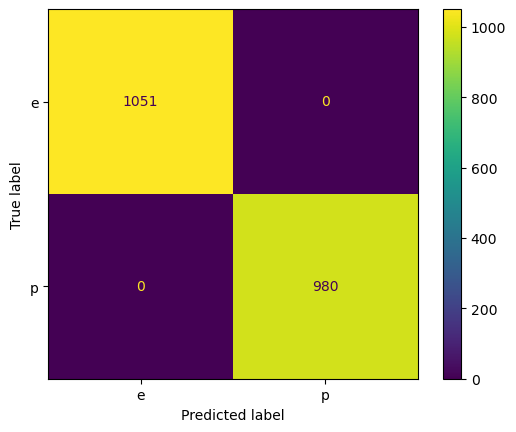

In [91]:
# Decision Tree Model

tree_params = {'max_depth':np.arange(1, 11),
               'min_samples_split': np.arange(2, 11)}

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf, 
                   param_grid = tree_params, 
                   cv = 5)

grid_search.fit(X_train, y_train)

best_tree_clf = grid_search.best_estimator_

y_pred_tree = best_tree_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()

[Text(0.5882352941176471, 0.9285714285714286, 'odor_n <= 0.5\ngini = 0.499\nsamples = 6093\nvalue = [3157, 2936]\nclass = e'),
 Text(0.35294117647058826, 0.7857142857142857, 'stalk_root_c <= 0.5\ngini = 0.287\nsamples = 3448\nvalue = [598, 2850]\nclass = p'),
 Text(0.47058823529411764, 0.8571428571428572, 'True  '),
 Text(0.23529411764705882, 0.6428571428571429, 'stalk_root_r <= 0.5\ngini = 0.125\nsamples = 3034\nvalue = [204, 2830]\nclass = p'),
 Text(0.17647058823529413, 0.5, 'odor_a <= 0.5\ngini = 0.046\nsamples = 2899\nvalue = [69, 2830]\nclass = p'),
 Text(0.11764705882352941, 0.35714285714285715, 'odor_l <= 0.5\ngini = 0.023\nsamples = 2863\nvalue = [33, 2830]\nclass = p'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 2830\nvalue = [0, 2830]\nclass = p'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = e'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 36\nvalue = [36, 0]\nclas

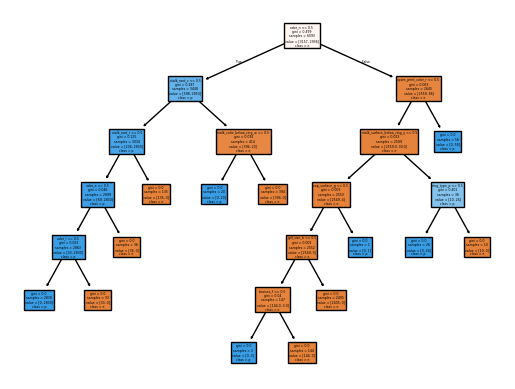

In [92]:
plot_tree(best_tree_clf, feature_names=feature_names, class_names=label_names, filled=True)

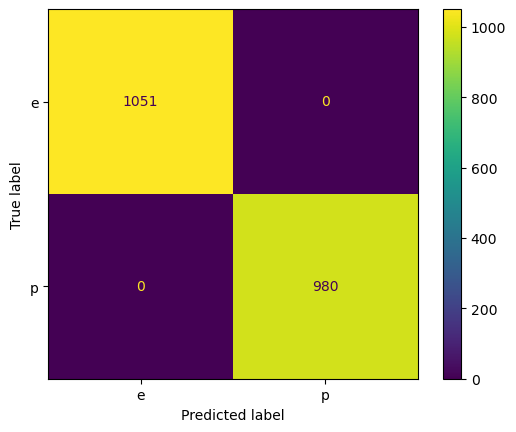

In [93]:
# Random Forest Model

forest_params = {'max_depth': np.arange(1, 11),
                 'min_samples_split': np.arange(2, 11)}
forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf,
                   param_grid = forest_params,
                   cv = 5)

grid_search.fit(X_train, y_train)

best_forest_clf = grid_search.best_estimator_

y_pred_forest = best_forest_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()


### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [7]:
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

#Print the feature names, which are the columns of the DataFrame
for k, col in enumerate(nfl_draft.columns):
    print(f'{k:>3}. {col}')

nfl_draft.head()

  0. Unnamed: 0
  1. round
  2. season
  3. name
  4. age
  5. position
  6. college_conference
  7. height
  8. weight
  9. forty
 10. vertical
 11. broad_jump
 12. cone
 13. shuttle


,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


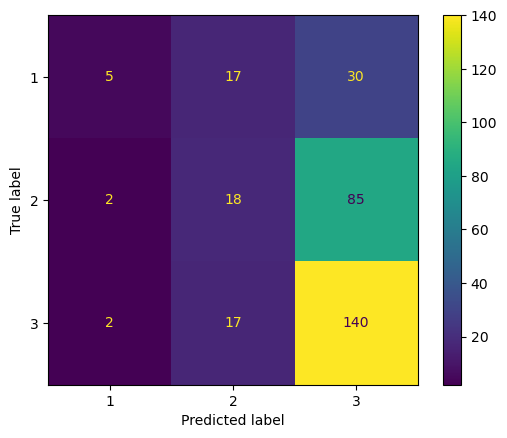

In [ ]:
# Create a column for day. If the round is 1, then the day is 1. If the round is 2 or 3, then the day is 2. Otherwise, the day is 3.
nfl_draft['day'] = nfl_draft['round'].apply(lambda x: 1 if x == 1 else 2 if x == 2 or x == 3 else 3)

nfl_draft_mod = nfl_draft.drop(columns=['round', 'Unnamed: 0', 'name', 'college_conference', 'cone', 'shuttle'])
nfl_draft_mod = nfl_draft_mod.dropna()

y = nfl_draft_mod['day']
X = nfl_draft_mod.drop(columns='day')


# Encode the non-numeric columns
cat_features = ['position']
cat_enc = OneHotEncoder()

num_features = ['height', 'weight', 'forty', 'vertical', 'broad_jump',]
ss = StandardScaler()

ct = ColumnTransformer([
    ('hot', cat_enc, cat_features),
    ('num', ss, num_features)
],
    remainder='passthrough',
    verbose_feature_names_out=False
    )

X_trans = ct.fit_transform(X)
feature_names = ct.get_feature_names_out()

lab_enc = LabelEncoder()

y_trans = lab_enc.fit_transform(y)
label_names = lab_enc.classes_

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans)

# Random Forest Model 

forest_params = {'max_depth': np.arange(1, 11),
                    'min_samples_split': np.arange(2, 11)}
forest_clf = RandomForestClassifier()

grid_search = GridSearchCV(forest_clf,
                   param_grid = forest_params,
                   cv = 5)

grid_search.fit(X_train, y_train)

best_forest_clf = grid_search.best_estimator_

y_pred_forest = best_forest_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()




### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 All models seemed to be predicting relatively similar, so I elected to use the Random Forest Model. Note I dropped columns: Conference, Cone, and Shuttle, since they all had significant amount of null data and I felt dropping those rows would eliminate too much information.
 - What was your accuracy?
 The accuracy was 0.5355.